# Simple demonstration of `sc_run.py`

The module `sc_run.py` provides some convenience functions for running pedestrian-vehicle interaction simulations with the best-performing models in the "Explaining human interactions..." paper, using parameterisations that were identified as working well in that paper.

## Maximally successful deterministic model

The maximally successful deterministic model was `oVAoBEvoAI`, i.e., the model with affordance-based value estimation and action-sensitive, value-based behaviour estimation. To get all of the parameterisations that were identified for this model as achieving at least three of the five targeted behavioural phenomena (the maximum achieved was four, but only for a very limited set of parameterisations), you can use the function `sc_run.get_model_with_params`, which returns a `sc_fitting.ModelWithParams` object:

In [1]:
import sc_run
import sc_fitting
help(sc_run.get_model_with_params)
print('\n')
help(sc_fitting.ModelWithParams)

Help on function get_model_with_params in module sc_run:

get_model_with_params(model_name, param_bounds=None)
    Return an sc_fitting.ModelWithParams object for a specified model, with
    retained parameterisations, i.e., parameterisations found to be working 
    well for this model in the SCPaper model testing/fitting.
    
    Parameters
    ----------
    model_name: str
        A string defining a model (e.g., 'oVAoBEvoAI').
    param_bounds: dict
        A dictionary with parameter names as keys, and tuples with lower and 
        upper bounds as values. If None, the full list of retained 
        parameterisations. If not None, these bounds will be used to 
        remove any parameterisations outside of the bounds before returning.
        Default: None
        
    Returns
    -------
    An sc_fitting.ModelWithParams object.



Help on class ModelWithParams in module sc_fitting:

class ModelWithParams(builtins.object)
 |  ModelWithParams(model: str, param_names: list, para

For example like this:

In [2]:
det_model = sc_run.get_model_with_params('oVAoBEvoAI')
print('\nParameter names:')
print(det_model.param_names)
print('\nRetained parameterisations:')
print(det_model.params_array)

Loading "c:\GITHUB\COMMOTIONSFramework\SCPaper/results/RetainedDetModels.pkl"...
	Done.

Parameter names:
('T_delta', 'beta_V')

Retained parameterisations:
[[ 10.           5.84803548]
 [ 12.91549665   5.84803548]
 [ 16.68100537   5.84803548]
 [ 21.5443469    5.84803548]
 [ 27.82559402   5.84803548]
 [ 35.93813664   5.84803548]
 [ 46.41588834   5.84803548]
 [ 59.94842503   5.84803548]
 [ 77.42636827   5.84803548]
 [100.           5.84803548]
 [ 10.          10.53610277]
 [ 12.91549665  10.53610277]
 [ 16.68100537  10.53610277]
 [ 21.5443469   10.53610277]
 [ 27.82559402  10.53610277]
 [ 35.93813664  10.53610277]
 [ 46.41588834  10.53610277]
 [ 59.94842503  10.53610277]
 [ 77.42636827  10.53610277]
 [100.          10.53610277]
 [ 10.          18.98235091]
 [ 12.91549665  18.98235091]
 [ 16.68100537  18.98235091]
 [ 21.5443469   18.98235091]
 [ 27.82559402  18.98235091]
 [ 35.93813664  18.98235091]
 [ 46.41588834  18.98235091]
 [ 59.94842503  18.98235091]
 [ 77.42636827  18.98235091]
 [

To run a simulation with one of these parameterisations, you can use the function `sc_run.run_simulation`, which allows you to specify initial conditions:

In [3]:
help(sc_run.run_simulation)

Help on function run_simulation in module sc_run:

run_simulation(model, initial_cp_distances, initial_speeds, end_time, ped_prio=False, params_dict=None, idx_parameterisation=None, noise_seeds=(None, None))
    Run one simulation.
    
    Parameters
    ----------
    model: str or sc_fitting.ModelWithParams
        Either a string model identifier (e.g., 'oVAoBEvoAI') or a 
        ModelWithParams object.
    initial_cp_distances: tuple of float
        Initial distances, in metres, from the centre points of pedestrian 
        and car (in that order) to the crossing point of their trajectories.
    initial_speeds: tuple of float
        Initial speeds, in metres per second, of pedestrian and car. Can be
        zero for the pedestrian, but not for the car.
    end_time: float
        Duration of simulation.
    ped_prio: bool
        If True, means that the pedestrian has crossing priority (e.g., zebra
        crossing). Default: False
    params_dict: dict
        A dict with para

For example like this, where I am using the first retained parameterisation, and where I have set the initial speed of both agents to their free speeds:

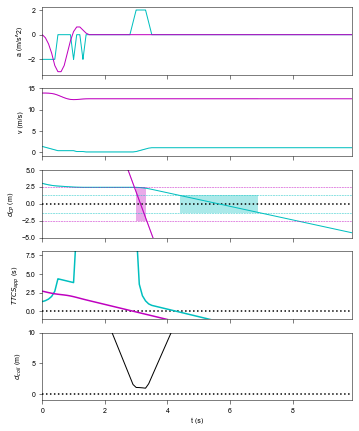

In [4]:
import numpy as np

sim = sc_run.run_simulation(det_model, initial_cp_distances=(3, 40), 
                            initial_speeds=sc_fitting.AGENT_FREE_SPEEDS, 
                            end_time=10, ped_prio=False, idx_parameterisation=0)
sim.do_plots(kinem_states=True)

The panels above show the pedestrian in blue and car in purple, and from top to bottom the panels show acceleration, speed, distance to the crossing point (shaded areas show when the two agents are within the conflict space, i.e., such that a collision could occur), apparent time to entry into the conflict space, and distance margin to collision between the agents. 

As can be seen, in this simulation the pedestrian yielded to the driver, and the driver passed first. This was with `ped_prio=False`, e.g., the pedestrian did not have crossing priority (no zebra crossing). Changing this makes the car driver try a little bit harder to yield:

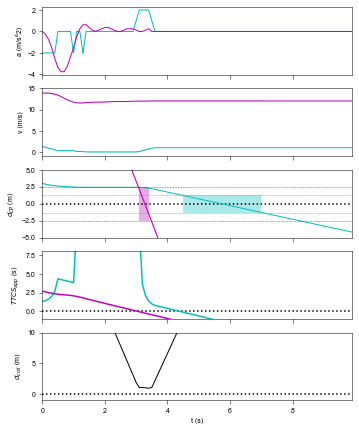

In [5]:
sim = sc_run.run_simulation(det_model, initial_cp_distances=(3, 40), 
                            initial_speeds=sc_fitting.AGENT_FREE_SPEEDS, 
                            end_time=10, ped_prio=True, idx_parameterisation=0)
sim.do_plots(kinem_states=True)

But the driver doesn't completely yield. Part of the reason for this is that the specific parameterisation we used:

In [6]:
print(det_model.get_params_dict(idx_parameterisation=0))

{'T_delta': 10.0, 'beta_V': 5.848035476425731}


... has a quite low $T_\delta$ value, which means that there is rapid discounting of future rewards, in other words the agents are quite "stressed". As mentioned in the help for function `sc_run.get_model_with_params`, we can choose to only include parameters within a certain range, to for example only include $T_\delta \geq$ 40 s:

In [7]:
det_model_no_stress = sc_run.get_model_with_params('oVAoBEvoAI', param_bounds={'T_delta': (40, np.inf)})
print('\nParameter names:')
print(det_model_no_stress.param_names)
print('\nRetained parameterisations:')
print(det_model_no_stress.params_array)

Loading "c:\GITHUB\COMMOTIONSFramework\SCPaper/results/RetainedDetModels.pkl"...
	Done.

Parameter names:
('T_delta', 'beta_V')

Retained parameterisations:
[[ 46.41588834   5.84803548]
 [ 59.94842503   5.84803548]
 [ 77.42636827   5.84803548]
 [100.           5.84803548]
 [ 46.41588834  10.53610277]
 [ 59.94842503  10.53610277]
 [ 77.42636827  10.53610277]
 [100.          10.53610277]
 [ 46.41588834  18.98235091]
 [ 59.94842503  18.98235091]
 [ 77.42636827  18.98235091]
 [100.          18.98235091]
 [ 46.41588834  34.19951893]
 [ 59.94842503  34.19951893]
 [ 77.42636827  34.19951893]
 [100.          34.19951893]
 [ 46.41588834  61.61550278]
 [ 59.94842503  61.61550278]
 [ 77.42636827  61.61550278]
 [ 46.41588834 111.00946156]
 [ 59.94842503 111.00946156]
 [ 77.42636827 111.00946156]
 [100.         111.00946156]
 [ 46.41588834 200.        ]
 [ 59.94842503 200.        ]
 [ 77.42636827 200.        ]
 [100.         200.        ]]


Running the same simulation as above again, with these "less stressed" agents, the driver now completely yields, and the pedestrian passes first:


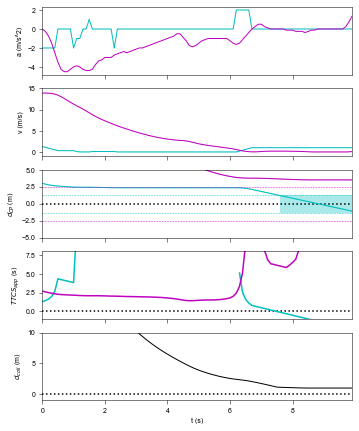

In [8]:
sim = sc_run.run_simulation(det_model_no_stress, initial_cp_distances=(3, 40), 
                            initial_speeds=sc_fitting.AGENT_FREE_SPEEDS, 
                            end_time=10, ped_prio=True, idx_parameterisation=0)
sim.do_plots(kinem_states=True)

One possible way of making use of these functions is to consider the set of retained parameterisations as an artificial population of agents, and run simulations across that entire population, e.g., like below, where I am again running the same scenario, but across all retained parameterisations for this model, and plotting the distance-distance trajectory for each simulations:

Simulating all 69 parameterisations of model oVAoBEvoAI...


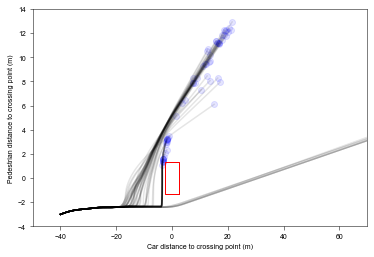

In [26]:
import matplotlib.pyplot as plt
import numpy.random

# example function for running a number of parameterisations of a model on the
# same example scenario as used above (with zebra crossing)
def sim_pop_example_scenario(model, n_max_parameterisations=None):
        if (n_max_parameterisations is None) or (n_max_parameterisations >= model.n_parameterisations):
                # simulate all of the parameterisations for this model
                idx_params_to_simulate = range(model.n_parameterisations)
                print(f'Simulating all {model.n_parameterisations} '
                      f'parameterisations of model {model.model}...')
        else:
                # choose a random subset of parameterisations to simulate
                rng = np.random.default_rng(seed=0)
                idx_params_to_simulate = rng.choice(model.n_parameterisations, 
                                                    n_max_parameterisations,
                                                    replace=False)
                print(f'Simulating a random subset of {n_max_parameterisations}'
                      f' out of the {model.n_parameterisations} parameterisations'
                      f' of model {model.model}...')
        # loop through parameterisations to simulate
        for idx_params in idx_params_to_simulate:
                # run one simulation
                sim = sc_run.run_simulation(model, initial_cp_distances=(3, 40), 
                                            initial_speeds=sc_fitting.AGENT_FREE_SPEEDS, 
                                            end_time=10, ped_prio=True, 
                                            idx_parameterisation=idx_params)
                # add a distance-distance trajectory to the figure
                plt.plot(-sim.agents[sc_fitting.i_VEH_AGENT].signed_CP_dists, 
                         -sim.agents[sc_fitting.i_PED_AGENT].signed_CP_dists, 
                         c='k', alpha=0.1)
                # add an indication of the final distance-distance point
                plt.plot(-sim.agents[sc_fitting.i_VEH_AGENT].signed_CP_dists[-1], 
                         -sim.agents[sc_fitting.i_PED_AGENT].signed_CP_dists[-1], 
                         'o', ms=6, c='b', alpha=0.1)
        # add rectangle showing the conflict space
        plt.plot(np.array((1, 1, -1, -1, 1)) * sc_fitting.AGENT_COLL_DISTS[sc_fitting.i_VEH_AGENT], 
                 np.array((-1, 1, 1, -1, -1)) * sc_fitting.AGENT_COLL_DISTS[sc_fitting.i_PED_AGENT], 
                 c='r', lw=1)
        plt.xlabel('Car distance to crossing point (m)')
        plt.ylabel('Pedestrian distance to crossing point (m)')
        plt.xlim(-50, 70)
        plt.ylim(-4, 14)
                
# simulate all parameterisations of the maximally successful deterministic model
sim_pop_example_scenario(det_model)

The red square above shows positions in which there would be a collision between the agents. The blue dots show where the simulthe situation at time of simulation end (after 10 s).

Above, we can see some parameterisations where the car driver doesn't yield to the pedestrian (trajectory goes below the red square), some parameterisations where the driver yields but only just barely, causing the pedestrian to wait until the car has come nearly to a full stop before beginning to cross (trajectories passing close to the red square on the left), and some parameterisations where the driver yields with exaggerated deceleration (short-stopping), prompting earlier crossing by the pedestrian (trajectories passing above the red square with quite some margin).

## Maximally successful stochastic model

The maximally successful stochastic model in the paper was `oVAoBEvoAIoEAoSNvoPF`, i.e., the same model as above, but extended also with evidence accumulation decision-making, angular visual noise, and Bayesian perceptual filtering. The same functions as above can be used with this model as well, e.g., as follows:

Loading "c:\GITHUB\COMMOTIONSFramework\SCPaper/results/RetainedCombModels.pkl"...
	Done.
Simulating a random subset of 100 out of the 1091 parameterisations of model oVAoBEvoAIoEAoSNvoPF...


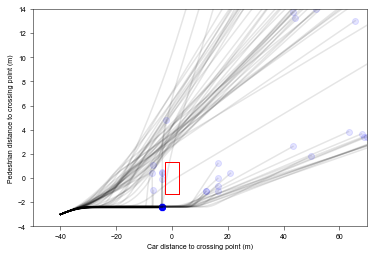

In [27]:
stoch_model = sc_run.get_model_with_params('oVAoBEvoAIoEAoSNvoPF')
sim_pop_example_scenario(stoch_model, n_max_parameterisations=100)

## Stochastic model with alternative evidence accumulation formulation

As can be seen above, and as described in the paper, this model has a tendency to get stuck at zero speed (the blue dots just below the red square). A key reason for this is the evidence accumulation formulation, where an action $a$ is taken if the estimated advantage in value of $a$ over non-action $a_\varnothing$

$$\Delta V_a(k) = \hat{V}_{a}(k) - \hat{V}_{a_\varnothing}(k)$$

is greater than a threshold $\Delta V_\mathrm{th}$. Crucially, in the model described in the paper, $\hat{V}_{a}$ is a low-pass filtered version of the the noisy estimated value $\tilde{V}_a$, which means that if $\tilde{V}_{a} - \tilde{V}_{a_\varnothing} < \Delta V_\mathrm{th}$, $\Delta V_a$ will converge toward a value below the decision threshold, i.e., the evidence accumulation may never result in a decision.

Therefore, I have also experimented with an alternative formulation, which does not do low-pass filtering of value. As described in the 2022-07-19b diary notes, this formulation, which I have labelled `oDA`, instead accumulates action evidence $\xi_a$ for each action alternative $a$ as:

$$
\frac{\mathrm{d}\xi_a}{\mathrm{d}t}(k) = \Delta V_a(k),
$$

where the decision is made once $\xi_a > \xi_\mathrm{th}$, where $\xi_\mathrm{th}$ is a free model parameter, but where $\xi_a$ is now also constrained to be $\geq 0$ at each time step. In other words, there is no "leakage" here, but there is still forgetting, at the reflecting evidence boundary at $\xi_a = 0$. 

(Note that in principle, `oDA` and `oEA` are compatible - both can be assumed at the same time, and if so there is first low-pass filtering of action values $\hat{V}_{a}$, and then accumulation of action evidence $\xi_a$. In practice, I have not explored this type of combined model; I have always assumed only `oDA` and not `oEA`. In this case, there is no low-pass filtering, i.e., $\hat{V}_{a} = \tilde{V}_{a}$.)

As documented in the diary notes from 2022-07-21 - 2022-07-29, I have tested `oDA` model variants in the same way as the `oEA` model variants in the paper, finding that they generally behave quite similarly, but with a much reduced tendency of getting stuck for the `oDA` model. This can be seen in the example simulations below:

Loading "c:\GITHUB\COMMOTIONSFramework\SCPaper/results/RetainedCombModels.pkl"...
	Done.
Simulating a random subset of 100 out of the 193 parameterisations of model oVAoBEvoAIoDAoSNvoPF...


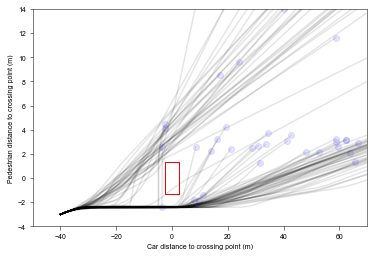

In [29]:
stoch_model_oDA = sc_run.get_model_with_params('oVAoBEvoAIoDAoSNvoPF')
sim_pop_example_scenario(stoch_model_oDA, n_max_parameterisations=100)

I note in the 2022-07-29 diary notes that for sufficiently low decision threshold $\xi_\mathrm{th}$, the `oDA` version of the maximally successful stochastic model does not get stuck at all. Below I am running simulations with $\xi_\mathrm{th}$ constrained in this way. Indeed, the model now never gets stuck, but now the pedestrian almost always crosses first, which is not in line with the results we have from our distributed simulator study. Therefore, the best approach may be to use the full set of 193 parameterisations as in the figure above.

Loading "c:\GITHUB\COMMOTIONSFramework\SCPaper/results/RetainedCombModels.pkl"...
	Done.
Simulating all 60 parameterisations of model oVAoBEvoAIoDAoSNvoPF...


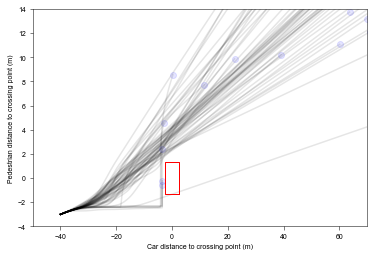

In [32]:
stoch_model_oDA_lowxi = sc_run.get_model_with_params('oVAoBEvoAIoDAoSNvoPF', param_bounds={'xi_th': (-np.inf, 1e-3)})
sim_pop_example_scenario(stoch_model_oDA_lowxi, n_max_parameterisations=100)